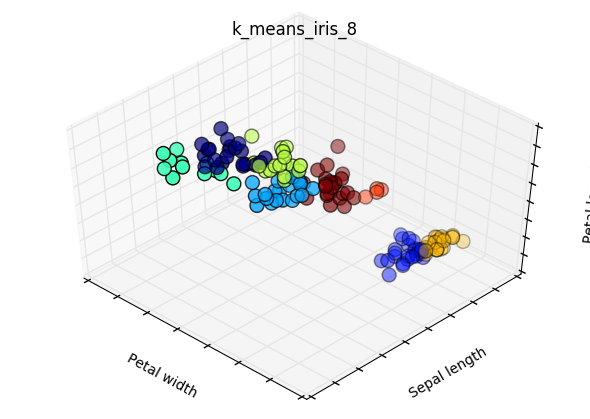

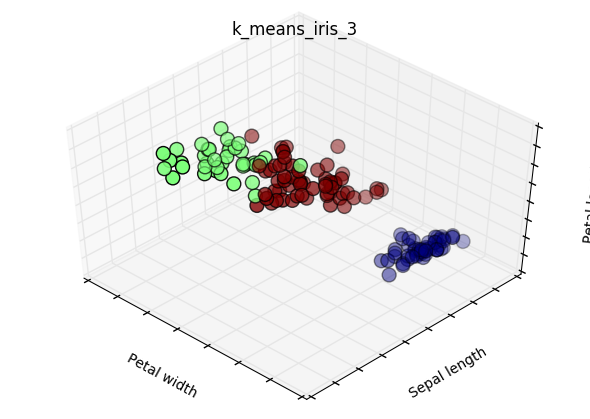

In [12]:
# iris data clustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1

plt.show()

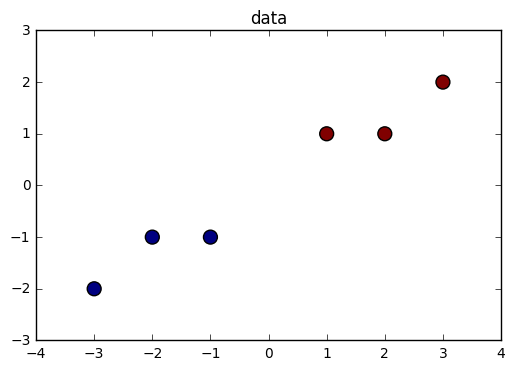

In [6]:
#qda
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
plt.scatter(X.T[0], X.T[1], c=y, s=100)
plt.title("data")
plt.show()

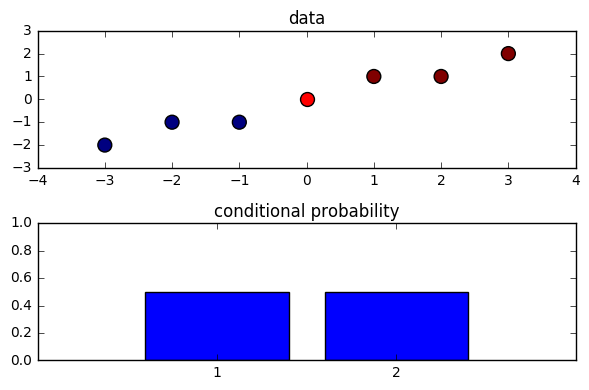

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

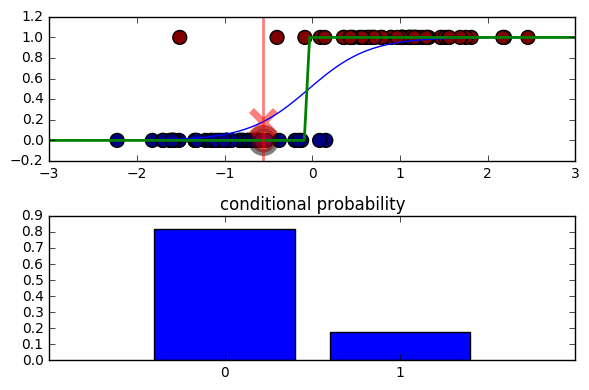

In [9]:
# 로지스틱회귀 - 분류보형중 가장 성능이 떨어짐 x_new 값에 따라 스레시홀드와 판별기준이 달라 질수 있음
# 즉 이상치가 들어왔을때 성능이 가장 떨어짐
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0[0], model.predict(X0[:1]), marker='o', s=300, c='r', lw=5, alpha=0.5)
plt.plot(xx, model.predict(xx[:, np.newaxis]) > 0.5, lw=2)
plt.scatter(X0[0], model.predict_proba(X0[:1])[0][1], marker='x', s=300, c='r', lw=5, alpha=0.5)
plt.axvline(X0[0], c='r', lw=2, alpha=0.5)
plt.xlim(-3, 3)
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0], align="center")
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.title("conditional probability")
plt.tight_layout()
plt.show()